In [1]:
#importing packages that will be needed to test the data

In [161]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import seaborn as sb
sb.set()
import datetime as at
import openpyxl  
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn import linear_model
from pylab import *
import scipy

In [99]:
#importing the data I will be using 

In [100]:
covid=pd.read_csv('/Users/jin/Desktop/Final-Project-/Data/covid19vaccinesadministeredbydemographics 2.csv')

In [101]:
covid.head(12)

covid19vaccinesadministeredbydemographics
county  demographic_category demographic_value        administered_date total_doses cumulative_total_doses pfizer_doses cumulative_pfizer_doses moderna_doses cumulative_moderna_doses jj_doses cumulative_jj_doses partially_vaccinated total_partially_vaccinated fully_vaccinated cumulative_fully_vaccinated at_least_one_dose cumulative_at_least_one_dose booster_recip_count cumulative_booster_recip_count               booster_eligible_population
Alameda Age Group            18-49                    2022-05-24        4691        34103581               2940         20171196                1674          12598288                 64       1320403             809                  1616426                    573              13266106                    848               14882532                     2349                6751750                                                         12826658
                             50-64                    2022-05-24        9419        17348656               5001         9212374                 4368          7375220                  31       745494              337                  577825                     330              6243630                     350               6821455                      1410                4047712                                                          6114559
                             65                       2022-05-24        14213       16417987               6963         7728306                 7185          8422995                  21       246821              334                  484580                     398              5508377                     338               5992957                      1332                4092974                                                          5411735
                             12-17                    2022-05-24        1144        5414757                1141         5398601                 3             11305                    0        1342                169                  224073                     157              2116037                     169               2340110                      801                 700520                                                           1964037
                             5-11                     2022-05-24        2570        2702236                2569         2699203                 0             1798                     0        238                 555                  185584                     538              1236883                     555               1422467                      1476                14715                                                                  0
        Gender               Female                   2022-05-24        16992       40021886               9945         23959764                6939          15010695                 57       1020356             1056                 1521252                    1041             14758007                    1084              16279259                     3972                8493751                                                         13728925
                             Male                     2022-05-24        15029       35868968               8659         21198629                6285          13360267                 59       1287518             1140                 1548533                    954              13576237                    1168              15124770                     3392                7105282                                                         12551052
                             Unknown/undifferentiated 2022-05-24        16          103257                 10           55077                   6             41303                    0        6819                8                    22309                      1                38397                       8                 60706                        4                   8651                      

In [102]:
#this is 11 rows of data to see some data a glance

In [103]:
#Imported another dataset

In [104]:
doses=pd.read_csv('/Users/jin/Desktop/Final-Project-/Data/covid19vaccine 16+.csv')

In [105]:
doses.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-17,1344.0,20185.0,361.0,14245.0,1345.0,34430.0,333440.0,6425.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-16,1319.0,19201.0,358.0,13884.0,1319.0,33085.0,334785.0,7770.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-15,3813.0,18240.0,767.0,13526.0,3813.0,31766.0,336104.0,9089.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-14,4228.0,15194.0,764.0,12759.0,4244.0,27953.0,339917.0,12902.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-13,3018.0,11714.0,666.0,11995.0,3018.0,23709.0,344161.0,17146.0,False


In [106]:
#this code is when you want to merge different data into one having a common column

In [107]:
c1=pd.concat([doses,covid])

In [108]:
#this shows the results of the merged data

In [109]:
c1.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data,covid19vaccinesadministeredbydemographics
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-17,1344.0,20185.0,361.0,14245.0,1345.0,34430.0,333440.0,6425.0,False,NaN
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-16,1319.0,19201.0,358.0,13884.0,1319.0,33085.0,334785.0,7770.0,False,NaN
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-15,3813.0,18240.0,767.0,13526.0,3813.0,31766.0,336104.0,9089.0,False,NaN
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-14,4228.0,15194.0,764.0,12759.0,4244.0,27953.0,339917.0,12902.0,False,NaN
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-05-13,3018.0,11714.0,666.0,11995.0,3018.0,23709.0,344161.0,17146.0,False,NaN


In [110]:
# the code below shows the column names and what type of data they are 

In [111]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165490 entries, 0 to ('Calaveras', 'Race/Ethnicity', 'Latino', '2020-01-05', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0')
Data columns (total 17 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   county                                     154462 non-null  object 
 1   county_type                                154462 non-null  object 
 2   demographic_category                       154462 non-null  object 
 3   demographic_value                          154462 non-null  object 
 4   est_population                             129206 non-null  float64
 5   est_age_16plus_pop                         129206 non-null  float64
 6   administered_date                          154462 non-null  object 
 7   partially_vaccinated                       151074 non-null  float64
 8   total_partially_vaccinated    

In [112]:
c1 = c1.drop(['county_type','demographic_category','demographic_value',
             'est_population', 'est_age_16plus_pop', 'administered_date','suppress_data', 
              'covid19vaccinesadministeredbydemographics'], axis=1) 

In [113]:
c1.head()

,county,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop
0,Alameda,1344.0,20185.0,361.0,14245.0,1345.0,34430.0,333440.0,6425.0
1,Alameda,1319.0,19201.0,358.0,13884.0,1319.0,33085.0,334785.0,7770.0
2,Alameda,3813.0,18240.0,767.0,13526.0,3813.0,31766.0,336104.0,9089.0
3,Alameda,4228.0,15194.0,764.0,12759.0,4244.0,27953.0,339917.0,12902.0
4,Alameda,3018.0,11714.0,666.0,11995.0,3018.0,23709.0,344161.0,17146.0


In [114]:
c1.isnull().sum()

county                          11028
partially_vaccinated            14416
total_partially_vaccinated      14416
fully_vaccinated                14416
cumulative_fully_vaccinated     14416
at_least_one_dose               14416
cumulative_at_least_one_dose    14416
cumulative_unvax_total_pop      39518
cumulative_unvax_16plus_pop     39518
dtype: int64

In [115]:
c1['fully_vaccinated'].fillna((c1['fully_vaccinated'].mean()), inplace=True)

In [116]:
c1['cumulative_unvax_total_pop'].fillna((c1['cumulative_unvax_total_pop'].mean()), inplace=True)

In [117]:
c1['at_least_one_dose'].fillna((c1['at_least_one_dose'].mean()), inplace=True)

In [118]:
#this code will drop all NaNs from your dataset

In [119]:
c1.dropna(inplace=True)

In [120]:
c1['cumulative_fully_vaccinated']=c1['cumulative_fully_vaccinated'].astype(int)

In [121]:
c1['fully_vaccinated']=c1['fully_vaccinated'].astype(int)

In [122]:
c1['at_least_one_dose']=c1['at_least_one_dose'].astype(int)

In [164]:
c1['cumulative_unvax_total_pop']=c1['cumulative_unvax_total_pop'].astype(int)

In [166]:
c1['partially_vaccinated']=c1['partially_vaccinated'].astype(int)

In [175]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125972 entries, 0 to 154461
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   county                        125972 non-null  object 
 1   partially_vaccinated          125972 non-null  int64  
 2   total_partially_vaccinated    125972 non-null  float64
 3   fully_vaccinated              125972 non-null  int64  
 4   cumulative_fully_vaccinated   125972 non-null  int64  
 5   at_least_one_dose             125972 non-null  int64  
 6   cumulative_at_least_one_dose  125972 non-null  float64
 7   cumulative_unvax_total_pop    125972 non-null  int64  
 8   cumulative_unvax_16plus_pop   125972 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 13.6+ MB


In [123]:
#the code below shows all columns names 

In [124]:
c1.columns

Index(['county', 'partially_vaccinated', 'total_partially_vaccinated',
       'fully_vaccinated', 'cumulative_fully_vaccinated', 'at_least_one_dose',
       'cumulative_at_least_one_dose', 'cumulative_unvax_total_pop',
       'cumulative_unvax_16plus_pop'],
      dtype='object')

In [125]:
# Which county has the lowest Vaccine rate?

In [126]:
c1.groupby('county')['fully_vaccinated'].mean()

county
Alameda             1016.735065
Alpine                 1.297619
Amador                17.193307
Butte                 93.200835
Calaveras             17.078788
Colusa                 8.765693
Contra Costa         725.095671
Del Norte             11.052489
El Dorado             89.220779
Fresno               392.942857
Glenn                 13.035714
Humboldt              65.857143
Imperial              79.537463
Inyo                   9.669295
Kern                 297.553680
Kings                 43.845654
Lake                  28.051020
Lassen                 6.850186
Los Angeles         4945.406061
Madera                56.196537
Marin                225.401598
Mariposa               5.534323
Mendocino             43.386580
Merced                85.946553
Modoc                  4.017316
Mono                  10.902597
Monterey             209.161905
Napa                  91.433673
Nevada                48.509276
Orange              1616.746753
Placer               208.221707
P

In [127]:
# Which county in in California have the highest vaccine rate?

In [128]:
c1.groupby('county')['fully_vaccinated'].max()

county
Alameda             10871
Alpine                 46
Amador                430
Butte                2169
Calaveras             459
Colusa                297
Contra Costa         8262
Del Norte             272
El Dorado            1353
Fresno               5063
Glenn                 282
Humboldt             1370
Imperial             1717
Inyo                  477
Kern                 3483
Kings                 727
Lake                  740
Lassen                653
Los Angeles         47609
Madera                832
Marin                3141
Mariposa              366
Mendocino            1367
Merced               1791
Modoc                 167
Mono                  780
Monterey             4265
Napa                 1763
Nevada                849
Orange              15214
Placer               2111
Plumas                508
Riverside            8864
Sacramento           5233
San Benito            597
San Bernardino       6736
San Diego           17119
San Francisco        6636
San J

/Users/jin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fully_vaccinated', ylabel='Density'>

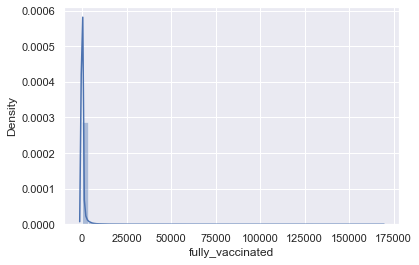

In [129]:
sns.distplot(c1['fully_vaccinated'])

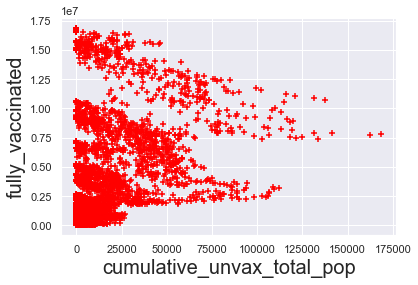

In [130]:
plt.scatter(c1['fully_vaccinated'],c1['cumulative_unvax_total_pop'], color='red', marker='+')
plt.xlabel('cumulative_unvax_total_pop', fontsize = 20)
plt.ylabel('fully_vaccinated', fontsize = 20)
plt.show()

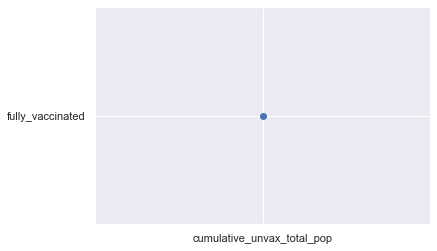

In [131]:
x=['cumulative_unvax_total_pop',]
y=['fully_vaccinated']
plt.scatter(x,y)
plt.show()

In [132]:
x=c1['cumulative_unvax_total_pop']
y=c1['fully_vaccinated']

In [133]:
c2= sm.OLS(y,x).fit()

In [134]:
pred_val = c2.fittedvalues.copy()
true_val = c1['fully_vaccinated'].values.copy()
residual = true_val - pred_val

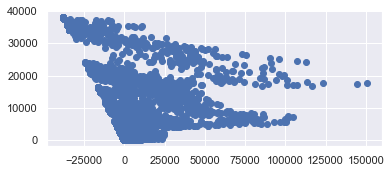

In [135]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [136]:
pred_val = c2.fittedvalues.copy()
true_val = c1['cumulative_unvax_total_pop'].values.copy()
residual = true_val - pred_val

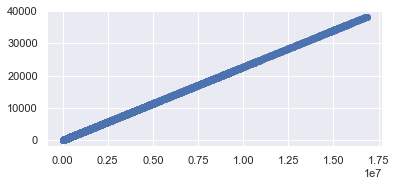

In [137]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [138]:
#testing to see if its homoscedasticity 

In [139]:
sms.diagnostic.het_breuschpagan(residual, c1[['fully_vaccinated']])

(21260.871170276754, nan, 25577.54110879841, 0.0)

In [140]:
sms.diagnostic.het_breuschpagan(residual, c1[['cumulative_unvax_total_pop']])

(107664.61600956651, nan, 740827.8184599306, 0.0)

In [141]:
#the results shows that its homoscedasticity 

In [142]:
sms.linear_harvey_collier(c2)

Ttest_1sampResult(statistic=17.665723959562694, pvalue=9.352682678852932e-70)

In [143]:
#The p-value shows that its below .05 which passes the test 

In [144]:
c1.corr()

,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop
partially_vaccinated,1.000000,0.872669,0.825047,0.610508,0.995084,0.732114,0.678030,0.695813
total_partially_vaccinated,0.872669,1.000000,0.928031,0.861873,0.879719,0.944273,0.628460,0.633279
fully_vaccinated,0.825047,0.928031,1.000000,0.829559,0.841912,0.895602,0.540083,0.540299
cumulative_fully_vaccinated,0.610508,0.861873,0.829559,1.000000,0.622748,0.980770,0.435254,0.422076
at_least_one_dose,0.995084,0.879719,0.841912,0.622748,1.000000,0.742772,0.667659,0.684612
cumulative_at_least_one_dose,0.732114,0.944273,0.895602,0.980770,0.742772,1.000000,0.524372,0.517678
cumulative_unvax_total_pop,0.678030,0.628460,0.540083,0.435254,0.667659,0.524372,1.000000,0.954807
cumulative_unvax_16plus_pop,0.695813,0.633279,0.540299,0.422076,0.684612,0.517678,0.954807,1.000000


<AxesSubplot:>

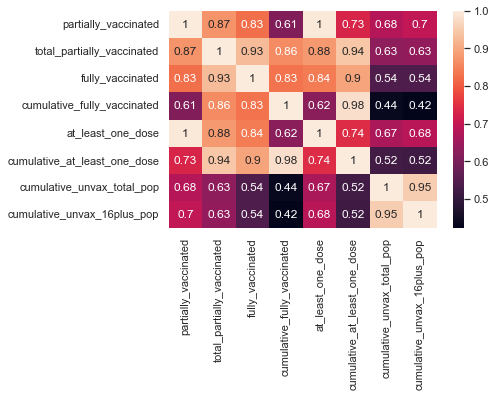

In [145]:
sns.heatmap(c1.corr(), annot=True)

In [146]:
infl = c2.get_influence()
print(infl.summary_frame())

        dfb_cumulative_unvax_total_pop       cooks_d  standard_resid  \
0                        -8.634369e-05  7.455291e-09       -0.103199   
1                        -8.802039e-05  7.747651e-09       -0.104780   
2                         1.158426e-06  1.341962e-12        0.001374   
3                        -1.424575e-06  2.029431e-12       -0.001670   
4                        -2.574118e-05  6.626138e-10       -0.029808   
...                                ...           ...             ...   
154457                   -2.259416e-12  5.114546e-24       -0.000023   
154458                   -2.259416e-12  5.114546e-24       -0.000023   
154459                   -2.259416e-12  5.114546e-24       -0.000023   
154460                   -2.259416e-12  5.114546e-24       -0.000023   
154461                   -2.259416e-12  5.114546e-24       -0.000023   

            hat_diag  dffits_internal  student_resid        dffits  
0       7.000280e-07    -8.634403e-05      -0.103198 -8.634369e-05

In [147]:
c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       fully_vaccinated   R-squared (uncentered):                   0.307
Model:                            OLS   Adj. R-squared (uncentered):              0.307
Method:                 Least Squares   F-statistic:                          5.577e+04
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                        0.00
Time:                        11:59:52   Log-Likelihood:                     -1.2179e+06
No. Observations:              125972   AIC:                                  2.436e+06
Df Residuals:                  125971   BIC:                                  2.436e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cumulative_unvax_total_pop     0.0023    9.6e-06    236.153      0.000       0.002       0.002
==============================================================================
Omnibus:                   214729.028   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        390947118.532
Skew:                          11.580   Prob(JB):                         0.00
Kurtosis:                     274.931   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#gonna start to runa ANOVA code 

In [176]:
categories = ['partially_vaccinated', 'at_least_one_dose','cumulative_unvax_total_pop']
c3 = c1['county'].isin(categories)
c4 = c1[c3].copy()

In [177]:
c5 = c4[['county','fully_vaccinated']]

In [178]:
c5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   county            0 non-null      object
 1   fully_vaccinated  0 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 0.0+ bytes


In [179]:
def recode (series):
    if series == "partially_vaccinated": 
        return 1
    if series == "at_least_one_dose": 
        return 2
    if series == "cumulative_unvax_total_pop": 
        return 3

c5['countyR'] = c5['county'].apply(recode)

In [180]:
c6=c5[['countyR','fully_vaccinated']]

<AxesSubplot:xlabel='fully_vaccinated'>

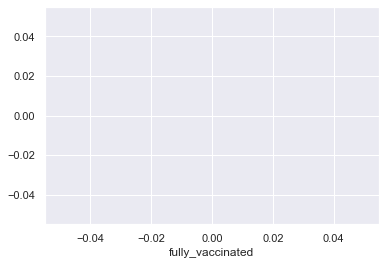

In [181]:
sns.distplot(c6['fully_vaccinated'])

In [182]:
c6['fully_vaccinatedSQRT'] = np.sqrt(c6['fully_vaccinated'])

In [183]:
scipy.stats.bartlett(c6['fully_vaccinatedSQRT'], c6['countyR'])

BartlettResult(statistic=nan, pvalue=nan)

In [184]:
scipy.stats.fligner(c6['fully_vaccinatedSQRT'], c6['countyR'])

FlignerResult(statistic=nan, pvalue=nan)

In [ ]:
#Going into Texas Database

In [238]:
Texas=pd.read_csv('/Users/jin/Desktop/Final-Project-/Data/texas county_level_vaccination 3.csv')

In [239]:
Texas.head()

,County,Texas_County,People-with-at-least-1-Dose-TX-Resident,People-Fully-Vaccinated-TX-Resident,Percent-of-Total-Pop-with-at-least-1-Dose-TX-Resident,Percent-of-Total-Pop-Fully-Vaccinated-TX-Resident,People-5+Fully-Vaccinated-TX-Resident,People-5+with-at-least-1-Dose-TX-Resident,Percent-of-5+Pop-with-at-least-1-Dose-TX-Resident,Percent-of 5+Pop-Fully-Vaccinated-TX-Resident,...,People-18+Fully-Vaccinated-TX-Resident,Percent-of-18+Pop-Fully-Vaccinated-TX-Resident,People-65+with-at-least-1-Dose- TX-Resident,People-65+Fully-Vaccinated-TX-Resident,Percent-65+Pop-at-least-1-Dose-TX-Resident,Percent-of-65+Pop-Fully-Vaccinated-TX-Resident,TX-Fully-Vaccinated-with-a-First-Booster-Dose,TX-%of-Fully-Vacc.-Population≥12-Years-of-Age-with-a-First-Booster-Dose,TX-%of-Fully-Vacc.-Population≥18-Years-of-Age-with-a-First-Booster-Dose,TX-%of-Fully-Vac.—Population≥65-Years-of-Age-with-a-First-Booster-Dose
0,NaN,Anderson County,26135,23074,45.3,40.0,23074,26135,47.7,42.1,...,22224,47.5,6247,5613,72.2,64.8,8894,38.8,39.7,57.1
1,NaN,Andrews County,9447,8334,50.5,44.6,8334,9446,55.2,48.7,...,7477,58.0,1709,1578,93.2,86.1,2944,36.4,38.5,66.3
2,NaN,Angelina County,46420,41035,53.5,47.3,41031,46409,57.3,50.7,...,38119,59.0,12578,11682,87.2,81.0,16577,41.0,42.9,66.9
3,NaN,Aransas County,15844,13600,67.4,57.8,13598,15842,70.7,60.7,...,12907,66.7,6347,5621,93.5,82.8,6214,46.2,47.8,65.3
4,NaN,Archer County,6056,5254,70.8,61.4,5254,6056,74.8,64.9,...,4871,72.6,1708,1518,95.0,90.5,1742,33.6,35.5,64.2


In [240]:
pd.value_counts('Texas_County')

Texas_County    12
dtype: int64

In [241]:
Texas.columns

Index(['County', 'Texas_County', 'People-with-at-least-1-Dose-TX-Resident',
       'People-Fully-Vaccinated-TX-Resident',
       'Percent-of-Total-Pop-with-at-least-1-Dose-TX-Resident',
       'Percent-of-Total-Pop-Fully-Vaccinated-TX-Resident',
       'People-5+Fully-Vaccinated-TX-Resident',
       'People-5+with-at-least-1-Dose-TX-Resident',
       'Percent-of-5+Pop-with-at-least-1-Dose-TX-Resident',
       'Percent-of 5+Pop-Fully-Vaccinated-TX-Resident',
       'People-12 Fully-Vaccinated-TX-Resident',
       'People-12+with-at-least-1-Dose-TX-Resident',
       'Percent-of-12+Pop-with-at-least-1-Dose-TX-Resident',
       'Percent-of-12+Pop-Fully-Vaccinated-TX-Resident',
       'People-18+with-at-least-1-Dose-TX-Resident',
       'Percent-of-18+Pop-with-at-least-1-Dose-TX-Resident',
       'People-18+Fully-Vaccinated-TX-Resident',
       'Percent-of-18+Pop-Fully-Vaccinated-TX-Resident',
       'People-65+with-at-least-1-Dose- TX-Resident',
       'People-65+Fully-Vaccinated-TX-Reside

In [242]:
Texas = Texas.drop(['Percent-of-Total-Pop-with-at-least-1-Dose-TX-Resident','Percent-of-Total-Pop-Fully-Vaccinated-TX-Resident',
                    'Percent-of-5+Pop-with-at-least-1-Dose-TX-Resident','Percent-of 5+Pop-Fully-Vaccinated-TX-Resident',
                   'Percent-of-12+Pop-with-at-least-1-Dose-TX-Resident','Percent-of-12+Pop-Fully-Vaccinated-TX-Resident',
                   'Percent-of-18+Pop-with-at-least-1-Dose-TX-Resident','Percent-of-18+Pop-Fully-Vaccinated-TX-Resident',
                   'Percent-65+Pop-at-least-1-Dose-TX-Resident','Percent-of-65+Pop-Fully-Vaccinated-TX-Resident',
                   'TX-%of-Fully-Vacc.-Population≥12-Years-of-Age-with-a-First-Booster-Dose',
                    'TX-%of-Fully-Vacc.-Population≥18-Years-of-Age-with-a-First-Booster-Dose',
                    'TX-%of-Fully-Vac.—Population≥65-Years-of-Age-with-a-First-Booster-Dose','County'], axis=1) 

In [243]:
Texas.head()

,Texas_County,People-with-at-least-1-Dose-TX-Resident,People-Fully-Vaccinated-TX-Resident,People-5+Fully-Vaccinated-TX-Resident,People-5+with-at-least-1-Dose-TX-Resident,People-12 Fully-Vaccinated-TX-Resident,People-12+with-at-least-1-Dose-TX-Resident,People-18+with-at-least-1-Dose-TX-Resident,People-18+Fully-Vaccinated-TX-Resident,People-65+with-at-least-1-Dose- TX-Resident,People-65+Fully-Vaccinated-TX-Resident,TX-Fully-Vaccinated-with-a-First-Booster-Dose
0,Anderson County,26135,23074,23074,26135,22894,25894,25106,22224,6247,5613,8894
1,Andrews County,9447,8334,8334,9446,8094,9131,8425,7477,1709,1578,2944
2,Angelina County,46420,41035,41031,46409,40412,45509,42834,38119,12578,11682,16577
3,Aransas County,15844,13600,13598,15842,13455,15628,14970,12907,6347,5621,6214
4,Archer County,6056,5254,5254,6056,5182,5938,5583,4871,1708,1518,1742


In [286]:
Texas.columns

Index(['Texas_County', 'People-with-at-least-1-Dose-TX-Resident',
       'People-Fully-Vaccinated-TX-Resident',
       'People-5+Fully-Vaccinated-TX-Resident',
       'People-5+with-at-least-1-Dose-TX-Resident',
       'People-12 Fully-Vaccinated-TX-Resident',
       'People-12+with-at-least-1-Dose-TX-Resident',
       'People-18+with-at-least-1-Dose-TX-Resident',
       'People-18+Fully-Vaccinated-TX-Resident',
       'People-65+with-at-least-1-Dose- TX-Resident',
       'People-65+Fully-Vaccinated-TX-Resident',
       'TX-Fully-Vaccinated-with-a-First-Booster-Dose'],
      dtype='object')

In [288]:
#this code lets you know what each column are 

In [289]:
Texas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Texas_County                                   255 non-null    object
 1   People-with-at-least-1-Dose-TX-Resident        255 non-null    int64 
 2   People-Fully-Vaccinated-TX-Resident            255 non-null    int64 
 3   People-5+Fully-Vaccinated-TX-Resident          255 non-null    int64 
 4   People-5+with-at-least-1-Dose-TX-Resident      255 non-null    int64 
 5   People-12 Fully-Vaccinated-TX-Resident         255 non-null    int64 
 6   People-12+with-at-least-1-Dose-TX-Resident     255 non-null    int64 
 7   People-18+with-at-least-1-Dose-TX-Resident     255 non-null    int64 
 8   People-18+Fully-Vaccinated-TX-Resident         255 non-null    int64 
 9   People-65+with-at-least-1-Dose- TX-Resident    255 non-null    in

In [290]:
Texas.groupby('Texas_County')['People-Fully-Vaccinated-TX-Resident'].max(6)

Texas_County
Anderson County    23074
Andrews County      8334
Angelina County    41035
Aransas County     13600
Archer County       5254
                   ...  
Wood County        19757
Yoakum County       3531
Young County        7508
Zapata County       8526
Zavala County       6841
Name: People-Fully-Vaccinated-TX-Resident, Length: 255, dtype: int64

In [291]:
#which county in Texas has the minimal vaccine rate?

In [292]:
Texas.groupby('Texas_County')['People-Fully-Vaccinated-TX-Resident'].min(6)

Texas_County
Anderson County    23074
Andrews County      8334
Angelina County    41035
Aransas County     13600
Archer County       5254
                   ...  
Wood County        19757
Yoakum County       3531
Young County        7508
Zapata County       8526
Zavala County       6841
Name: People-Fully-Vaccinated-TX-Resident, Length: 255, dtype: int64

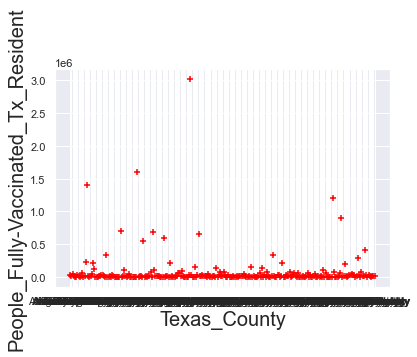

In [293]:
plt.scatter(Texas['Texas_County'], Texas['People-Fully-Vaccinated-TX-Resident'], color='red', marker='+')
plt.xlabel('Texas_County', fontsize = 20)
plt.ylabel('People_Fully-Vaccinated_Tx_Resident', fontsize = 20)
plt.show()

In [294]:
# plotting ascatter plot for linear regression

### x=['People-with-at-least-1-Dose-TX-Resident',]
y=['People-Fully-Vaccinated-TX-Resident']
plt.scatter(x,y)
plt.show()

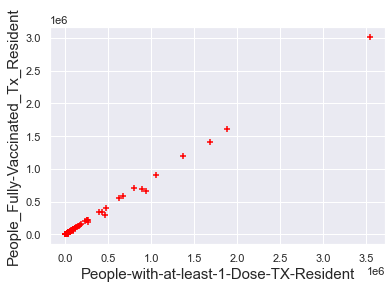

In [296]:
plt.scatter(Texas['People-with-at-least-1-Dose-TX-Resident'], Texas['People-Fully-Vaccinated-TX-Resident'], color='red', marker='+')
plt.xlabel('People-with-at-least-1-Dose-TX-Resident', fontsize = 15)
plt.ylabel('People_Fully-Vaccinated_Tx_Resident', fontsize = 15)
plt.show()

In [258]:
#the results show that the line is straight 

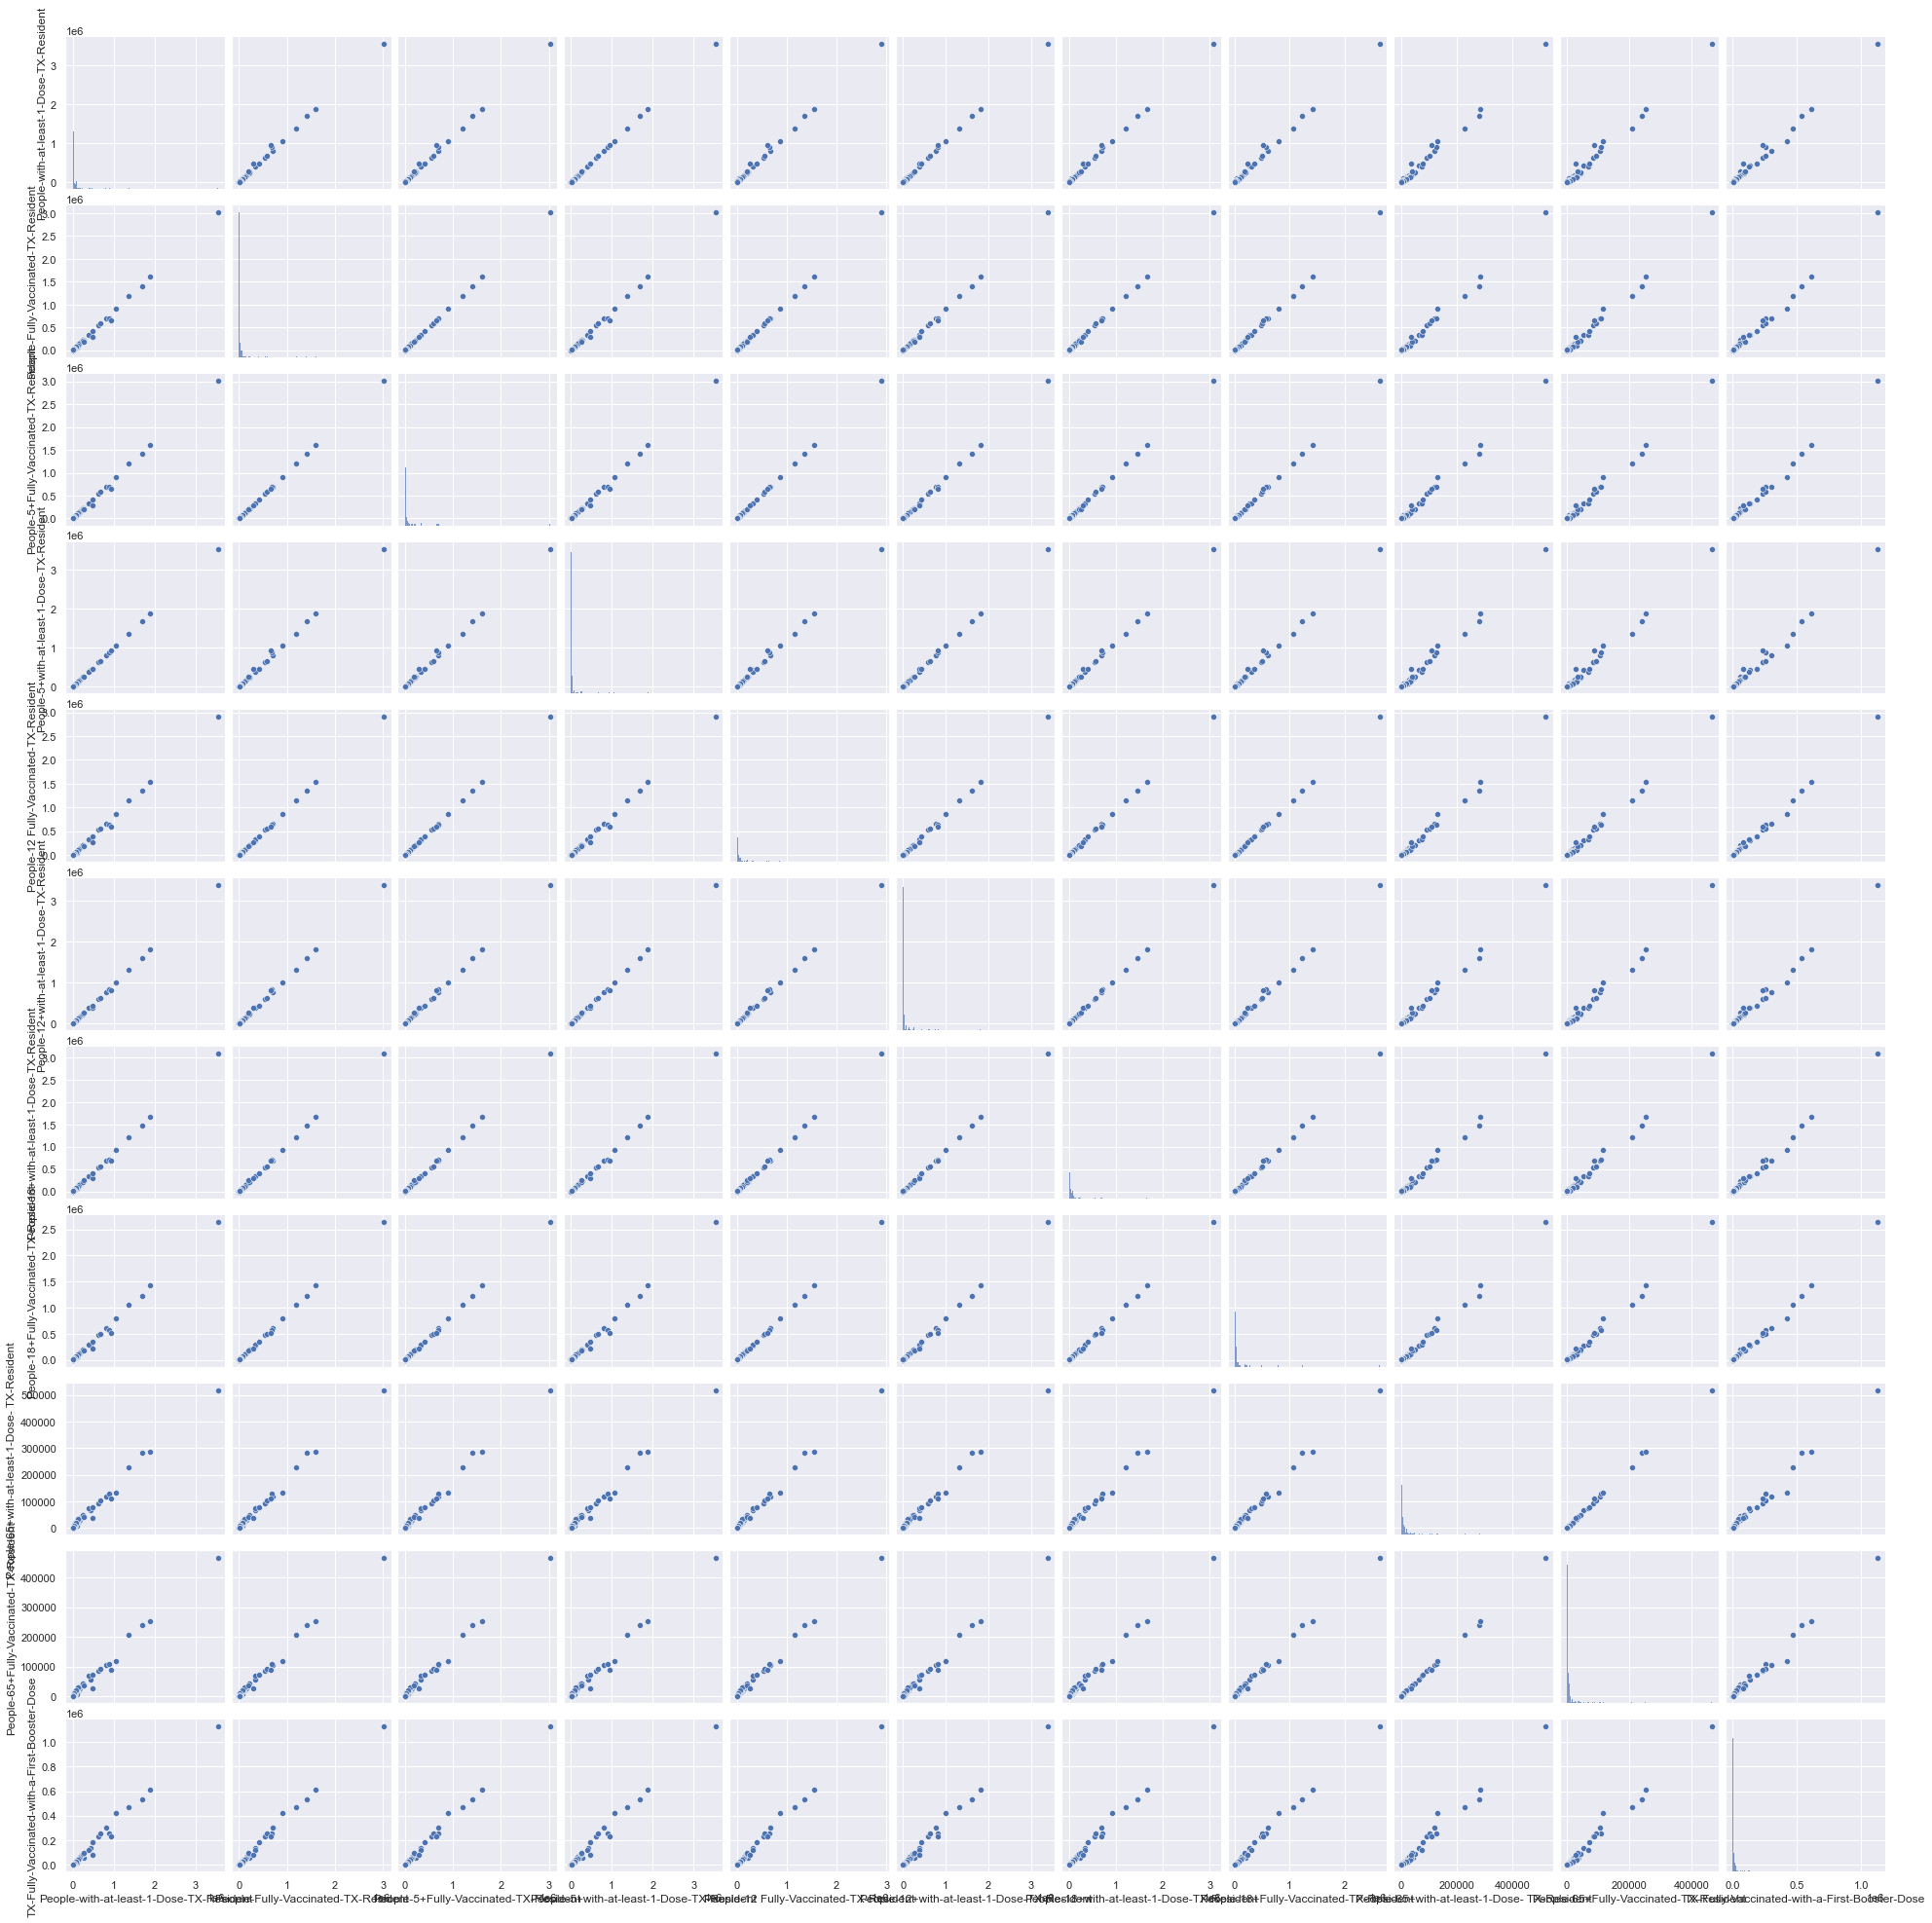

In [259]:
sns.pairplot(Texas)

/Users/jin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='People-Fully-Vaccinated-TX-Resident', ylabel='Density'>

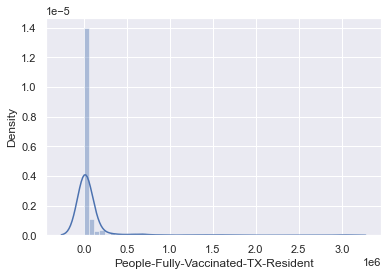

In [260]:
sns.distplot(Texas['People-Fully-Vaccinated-TX-Resident'])

In [297]:
# this displot is possitive

/Users/jin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='People-with-at-least-1-Dose-TX-Resident', ylabel='Density'>

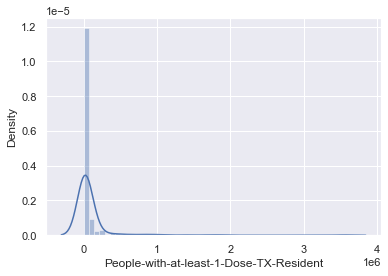

In [298]:
sns.distplot(Texas['People-with-at-least-1-Dose-TX-Resident'])

In [262]:
#the result show a normal positive reading 

In [299]:
x=Texas['People-with-at-least-1-Dose-TX-Resident']
y=Texas['People-Fully-Vaccinated-TX-Resident']

In [300]:
Texas1= sm.OLS(y,x).fit()

In [301]:
pred_val = Texas1.fittedvalues.copy()
true_val = Texas['People-Fully-Vaccinated-TX-Resident'].values.copy()
residual = true_val - pred_val

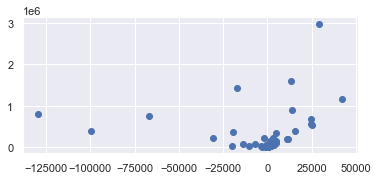

In [302]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [303]:
sms.diagnostic.het_breuschpagan(residual,Texas[['People-Fully-Vaccinated-TX-Resident']])

(19.651253420011393, nan, 21.208604002428554, 6.517868285649901e-06)

In [304]:
# this result show that the data set is signifcant and is a Homoscedasticity since the p-value is greater than 0.5

In [305]:
sms.linear_harvey_collier(Texas1)

Ttest_1sampResult(statistic=-0.4012721566286013, pvalue=0.6885611675696985)

In [306]:
# the results show the p-value is at 0.5 which this dataset passes Homoscedasticity test

In [307]:
Transformed, _ = boxcox(Texas['People-Fully-Vaccinated-TX-Resident'])

(array([[255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [241.,   6.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,   1.],
        [244.,   6.,   1.,   2.,   1.,   0.,   0.,   0.,   1.,   0.],
        [244.,   6.,   1.,   2.,   1.,   0.,   0.,   0.,   1.,   0.],
        [241.,   6.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,   1.],
        [244.,   6.,   1.,   2.,   1.,   0.,   0.,   0.,   1.,   0.],
        [241.,   6.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,   1.],
        [244.,   6.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   0.],
        [245.,   5.,   2.,   1.,   1.,   0.,   0.,   1.,   0.,   0.],
        [254.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [254.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [250.,   4.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.0, 354030.0, 708060.0, 1062090.0, 1416120.0, 1770150.0,
        2124180.0, 2478210.0, 2832240.0, 3186270.0, 3540300.0],
       dtype=object),
 <a li

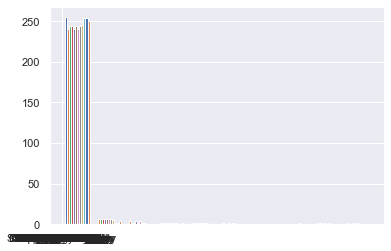

In [308]:
plt.hist(Texas)

In [309]:
Texas.corr()

,People-with-at-least-1-Dose-TX-Resident,People-Fully-Vaccinated-TX-Resident,People-5+Fully-Vaccinated-TX-Resident,People-5+with-at-least-1-Dose-TX-Resident,People-12 Fully-Vaccinated-TX-Resident,People-12+with-at-least-1-Dose-TX-Resident,People-18+with-at-least-1-Dose-TX-Resident,People-18+Fully-Vaccinated-TX-Resident,People-65+with-at-least-1-Dose- TX-Resident,People-65+Fully-Vaccinated-TX-Resident,TX-Fully-Vaccinated-with-a-First-Booster-Dose
People-with-at-least-1-Dose-TX-Resident,1.000000,0.998887,0.998886,1.000000,0.998347,0.999712,0.999043,0.997609,0.993793,0.992717,0.994951
People-Fully-Vaccinated-TX-Resident,0.998887,1.000000,1.000000,0.998893,0.999921,0.999605,0.999780,0.999670,0.995511,0.995450,0.997523
People-5+Fully-Vaccinated-TX-Resident,0.998886,1.000000,1.000000,0.998892,0.999921,0.999605,0.999780,0.999671,0.995513,0.995452,0.997523
People-5+with-at-least-1-Dose-TX-Resident,1.000000,0.998893,0.998892,1.000000,0.998355,0.999715,0.999048,0.997618,0.993803,0.992729,0.994958
People-12 Fully-Vaccinated-TX-Resident,0.998347,0.999921,0.999921,0.998355,1.000000,0.999349,0.999759,0.999904,0.995836,0.995988,0.997517
People-12+with-at-least-1-Dose-TX-Resident,0.999712,0.999605,0.999605,0.999715,0.999349,1.000000,0.999781,0.998890,0.995176,0.994528,0.996107
People-18+with-at-least-1-Dose-TX-Resident,0.999043,0.999780,0.999780,0.999048,0.999759,0.999781,1.000000,0.999579,0.995686,0.995433,0.996841
People-18+Fully-Vaccinated-TX-Resident,0.997609,0.999670,0.999671,0.997618,0.999904,0.998890,0.999579,1.000000,0.995799,0.996205,0.997609
People-65+with-at-least-1-Dose- TX-Resident,0.993793,0.995511,0.995513,0.993803,0.995836,0.995176,0.995686,0.995799,1.000000,0.999630,0.992016
People-65+Fully-Vaccinated-TX-Resident,0.992717,0.995450,0.995452,0.992729,0.995988,0.994528,0.995433,0.996205,0.999630,1.000000,0.992491


<AxesSubplot:>

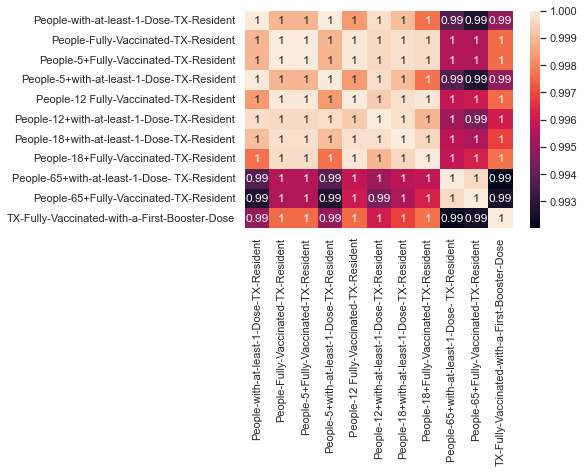

In [310]:
sns.heatmap(Texas.corr(), annot=True)

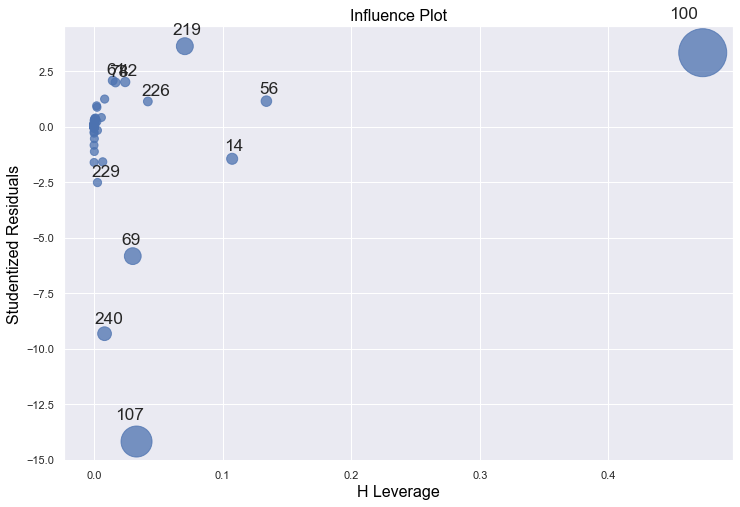

In [311]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(Texas1, alpha = .05, ax = ax, criterion="Cooks")

In [312]:
infl = Texas1.get_influence()
print(infl.summary_frame())

     dfb_People-with-at-least-1-Dose-TX-Resident       cooks_d  \
0                                   4.150427e-04  1.729367e-07   
1                                   5.326323e-05  2.848175e-09   
2                                   1.347019e-03  1.821470e-06   
3                                   5.653198e-05  3.208492e-09   
4                                   1.352415e-05  1.836256e-10   
..                                           ...           ...   
250                                 3.915202e-04  1.538889e-07   
251                                 4.378244e-07  1.924478e-13   
252                                 4.051166e-05  1.647678e-09   
253                                 7.362786e-06  5.442488e-11   
254                                 8.565803e-06  7.366298e-11   

     standard_resid      hat_diag  dffits_internal  student_resid  \
0          0.081867  2.580248e-05     4.158566e-04       0.081706   
1          0.029066  3.371354e-06     5.336830e-05       0.029008   


In [313]:
Texas1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     People-Fully-Vaccinated-TX-Resident   R-squared (uncentered):                   0.998
Model:                                             OLS   Adj. R-squared (uncentered):              0.998
Method:                                  Least Squares   F-statistic:                          1.220e+05
Date:                                 Fri, 17 Jun 2022   Prob (F-statistic):                        0.00
Time:                                         16:15:28   Log-Likelihood:                         -2765.5
No. Observations:                                  255   AIC:                                      5533.
Df Residuals:                                      254   BIC:                                      5536.
Df Model:                                            1                                                  
Covariance Type:                             nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
People-with-at-least-1-Dose-TX-Resident     0.8439      0.002    349.286      0.000       0.839       0.849
==============================================================================
Omnibus:                      368.180   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45162.695
Skew:                          -6.822   Prob(JB):                         0.00
Kurtosis:                      66.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""